In [14]:
#Importing packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et

sns.set(font_scale=1.5)
sns.set_style('white')

#Working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

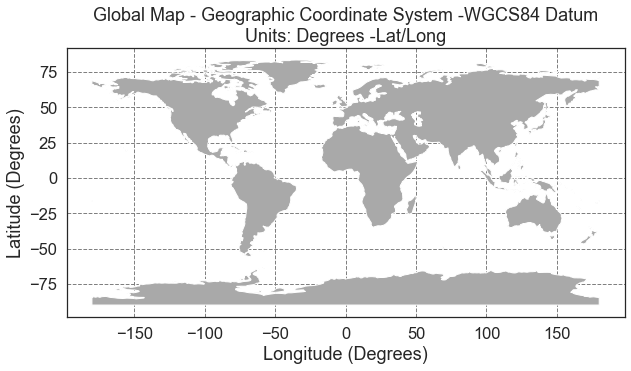

In [15]:
worldBound_path=os.path.join('data', 'earthpy-downloads','spatial-vector-lidar',
                            'global','ne_110m_land','ne_110m_land.shp')
worldBound=gpd.read_file(worldBound_path)

#Plot
f, ax = plt.subplots(figsize=(10,5))
worldBound.plot(color = 'darkgrey',
               ax=ax)
ax.set(xlabel='Longitude (Degrees)',ylabel='Latitude (Degrees)',
      title='Global Map - Geographic Coordinate System -WGCS84 Datum\nUnits: Degrees -Lat/Long')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray',linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle = 'dashed')
plt.show()

In [16]:
#Creating points
add_points = np.array([[-105.2519,40.0274],
                      [10.75,59.95],
                      [2.9833,39.6167]])
city_locations = [Point(xy) for xy in add_points]
city_locations = gpd.GeoDataFrame(city_locations,
                                 columns=['geometry'],
                                  crs=worldBound.crs)
city_locations.head(3)

,geometry
0,POINT (-105.25190 40.02740)
1,POINT (10.75000 59.95000)
2,POINT (2.98330 39.61670)


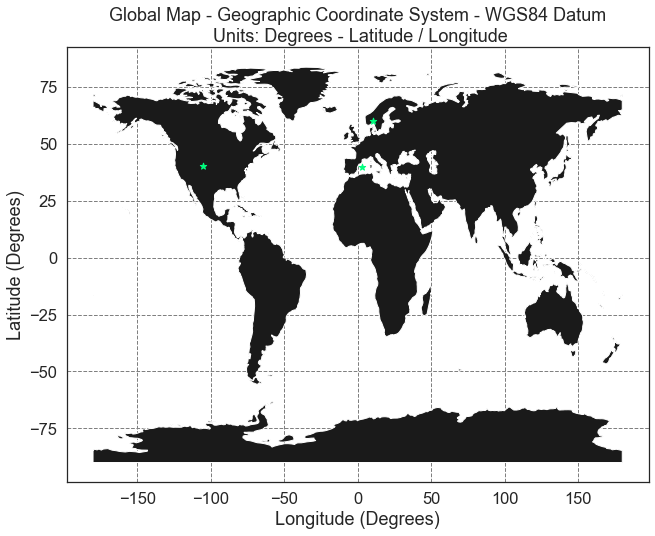

In [17]:
# Plot point locations
fig, ax = plt.subplots(figsize=(12, 8))

worldBound.plot(figsize=(10, 5), color='k',
               ax=ax)
# Add city locations
city_locations.plot(ax=ax, 
                    color='springgreen', 
                    marker='*',
                    markersize=45)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

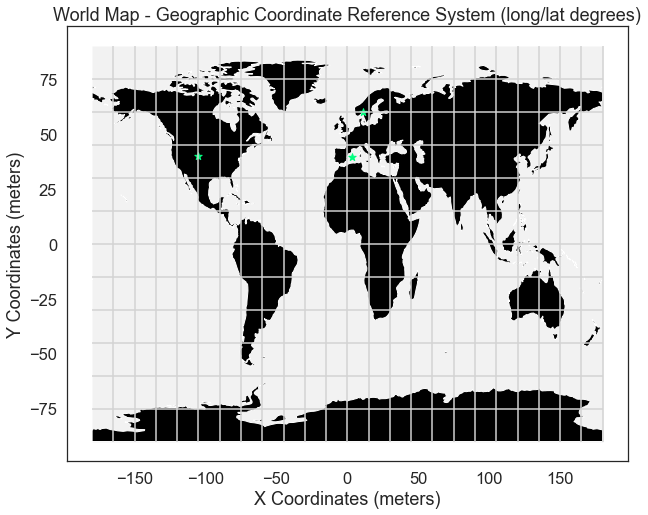

In [18]:
# Import graticule & world bounding box shapefile data
graticule_path = os.path.join("data",'earthpy-downloads', "spatial-vector-lidar", "global", 
                              "ne_110m_graticules_all", "ne_110m_graticules_15.shp")
graticule = gpd.read_file(graticule_path)

bbox_path = os.path.join("data",'earthpy-downloads', "spatial-vector-lidar", "global", 
                         "ne_110m_graticules_all", "ne_110m_wgs84_bounding_box.shp")
bbox = gpd.read_file(bbox_path)

# Create map axis object
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Add bounding box and graticule layers
bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBound.plot(ax=ax, color='black')

# Add points to plot 
city_locations.plot(ax=ax, 
                    markersize=60, 
                    color='springgreen',
                    marker='*')
# Add title and axes labels
ax.set(title="World Map - Geographic Coordinate Reference System (long/lat degrees)",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)");

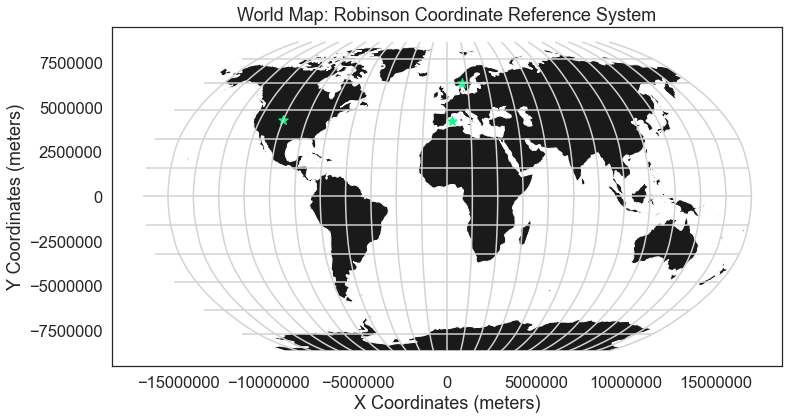

In [19]:
# Reproject the data
worldBound_robin = worldBound.to_crs('+proj=robin')
graticule_robin = graticule.to_crs('+proj=robin')
city_locations_robin = city_locations.to_crs('+proj=robin')
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color='k')

graticule_robin.plot(ax=ax, color='lightgrey')
city_locations_robin.plot(ax=ax, 
                    marker='*', 
                    color='springgreen', 
                    markersize=100)

ax.set(title="World Map: Robinson Coordinate Reference System",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

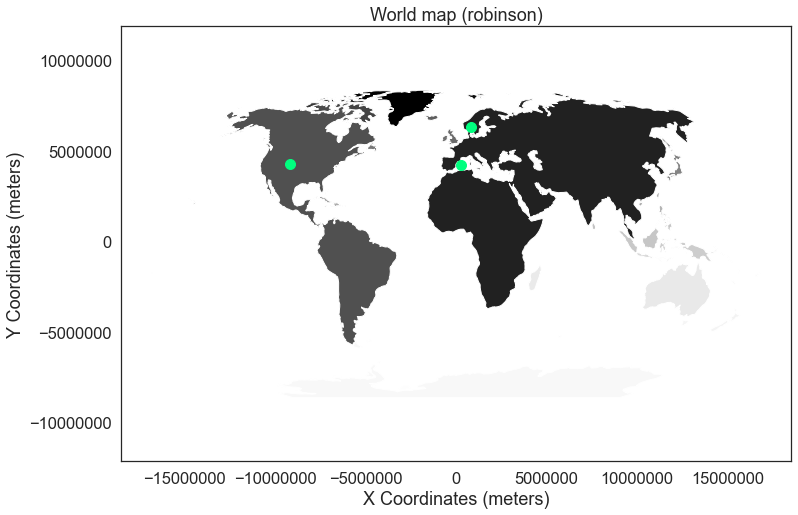

In [20]:
# Reproject point locations to the Robinson projection
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
worldBound_robin.plot(ax=ax, 
                      cmap='Greys')
ax.set(title="World map (robinson)", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
city_locations_robin.plot(ax=ax, markersize=100, color='springgreen')

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.axis('equal');

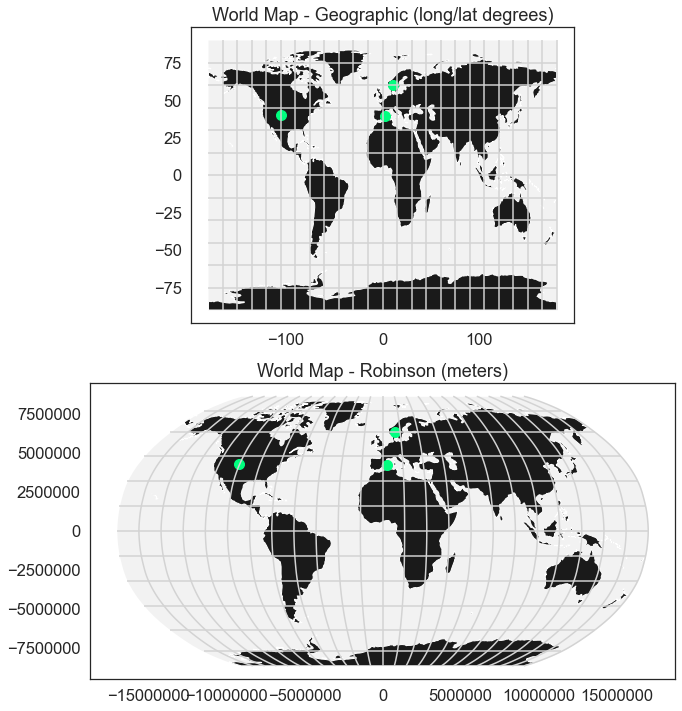

In [21]:
#Reprojecting graticules and bounding box to robinson
graticule_robinson = graticule.to_crs('+proj=robin')
bbox_robinson = bbox.to_crs('+proj=robin')

fig, (ax0,ax1) = plt.subplots(2,1,figsize = (13,12))
#Primer grafico
bbox.plot(ax = ax0,
         alpha = .1,
          color = 'grey')
graticule.plot(ax = ax0,
              color = 'lightgrey')
worldBound.plot(ax = ax0,
               color = 'k')
city_locations.plot(ax=ax0,
                   markersize = 100,
                   color = 'springgreen')
ax0.set(title = 'World Map - Geographic (long/lat degrees)')

#Second plot
bbox_robinson.plot(ax = ax1,
         alpha = .1,
          color = 'grey')
graticule_robinson.plot(ax = ax1,
              color = 'lightgrey')
worldBound_robin.plot(ax = ax1,
               color = 'k')
city_locations_robin.plot(ax=ax1,
                   markersize = 100,
                   color = 'springgreen')
ax1.set(title = 'World Map - Robinson (meters)')

for axis in [ax1.xaxis, ax1.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)